# Week 3 SA

Hey Everyone!!
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [145]:
import pandas as pd
import numpy as np

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [146]:
df = pd.read_csv('emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [148]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


## Looking at the data

In [149]:
max(df[df['Prediction']==1][df[df['Prediction']==1].columns[1]])

105

In [150]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
spam = [[] for i in range(len(df[df['Prediction']==1].columns)-2)]
count = 0
for i in range(1,len(df[df['Prediction'] == 1].columns)-1):
  spam[count].append(df[df['Prediction']==1].columns[i])
  spam[count].append(max(df[df['Prediction']==1][df[df['Prediction']==1].columns[i]]))
  count = count + 1

In [151]:
spam

[['the', 105],
 ['to', 132],
 ['ect', 42],
 ['and', 69],
 ['for', 45],
 ['of', 69],
 ['a', 1898],
 ['you', 36],
 ['hou', 27],
 ['in', 223],
 ['on', 302],
 ['is', 111],
 ['this', 25],
 ['enron', 0],
 ['i', 972],
 ['be', 67],
 ['that', 18],
 ['will', 20],
 ['have', 9],
 ['with', 21],
 ['your', 20],
 ['at', 267],
 ['we', 44],
 ['s', 858],
 ['are', 22],
 ['it', 131],
 ['by', 11],
 ['com', 75],
 ['as', 135],
 ['from', 17],
 ['gas', 19],
 ['or', 159],
 ['not', 20],
 ['me', 93],
 ['deal', 5],
 ['if', 34],
 ['meter', 2],
 ['hpl', 1],
 ['please', 8],
 ['re', 233],
 ['e', 2327],
 ['any', 31],
 ['our', 37],
 ['corp', 10],
 ['can', 28],
 ['d', 734],
 ['all', 66],
 ['has', 15],
 ['was', 15],
 ['know', 4],
 ['need', 14],
 ['an', 305],
 ['forwarded', 1],
 ['new', 19],
 ['t', 1299],
 ['may', 10],
 ['up', 40],
 ['j', 77],
 ['mmbtu', 0],
 ['should', 4],
 ['do', 56],
 ['am', 117],
 ['get', 12],
 ['out', 15],
 ['see', 10],
 ['no', 35],
 ['there', 6],
 ['price', 37],
 ['daren', 0],
 ['but', 14],
 ['been', 

In [152]:
spam_email_words = []
spam_email_maxcount = []
count = 0
for i in range(1,len(df[df['Prediction'] == 1].columns)-1):
  spam_email_words.append(df[df['Prediction']==1].columns[i])
  spam_email_maxcount.append(max(df[df['Prediction']==1][df[df['Prediction']==1].columns[i]]))
  count = count + 1;

In [153]:
print(count)

3000


In [154]:
spam_email_maxcount_copy = []
for i in range(len(spam_email_maxcount)):
  spam_email_maxcount_copy.append(spam_email_maxcount[i])

# spam_email_words_copy.sort(reverse=True)
spam_email_maxcount_copy.sort(reverse=True)

In [155]:
top5_maxcount = []
for i in range(5):
  top5_maxcount.append(spam_email_maxcount_copy[i])
top5_maxcount

[2327, 1898, 1555, 1420, 1299]

In [156]:
top5_maxcount_index = []
for i in range(len(top5_maxcount)):
  top5_maxcount_index.append(spam_email_maxcount.index(top5_maxcount[i]))

In [157]:
top5_maxcount_index
top5_spam_email_words = []
for i in range(len(top5_maxcount_index)):
  top5_spam_email_words.append(spam_email_words[top5_maxcount_index[i]])

In [158]:
top5_spam_email_words

['e', 'a', 'r', 'o', 't']

<BarContainer object of 5 artists>

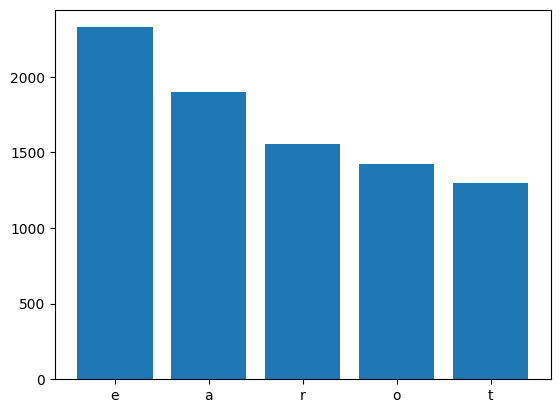

In [159]:
import matplotlib.pyplot as plt
plt.bar(top5_spam_email_words,top5_maxcount,align='center')

In [160]:
non_spam_email_words = []
non_spam_email_maxcount = []
count = 0
for i in range(1,len(df[df['Prediction'] == 0].columns)-1):
  non_spam_email_words.append(df[df['Prediction']==0].columns[i])
  non_spam_email_maxcount.append(max(df[df['Prediction']==0][df[df['Prediction']==0].columns[i]]))
  count = count + 1;

In [161]:
print(count)

3000


In [162]:
non_spam_email_maxcount_copy = []
for i in range(len(non_spam_email_maxcount)):
  non_spam_email_maxcount_copy.append(non_spam_email_maxcount[i])

# spam_email_words_copy.sort(reverse=True)
non_spam_email_maxcount_copy.sort(reverse=True)

In [163]:
top5_maxcount_non_spam = []
for i in range(5):
  top5_maxcount_non_spam.append(non_spam_email_maxcount_copy[i])
top5_maxcount_non_spam

[1751, 1571, 1450, 1384, 1254]

In [164]:
top5_maxcount_non_spam_index = []
for i in range(len(top5_maxcount_non_spam)):
  top5_maxcount_non_spam_index.append(non_spam_email_maxcount.index(top5_maxcount_non_spam[i]))

In [165]:
# top5_maxcount_index
top5_non_spam_email_words = []
for i in range(len(top5_maxcount_non_spam_index)):
  top5_non_spam_email_words.append(non_spam_email_words[top5_maxcount_non_spam_index[i]])

In [166]:
top5_non_spam_email_words

['o', 'e', 'a', 'm', 'c']

<BarContainer object of 5 artists>

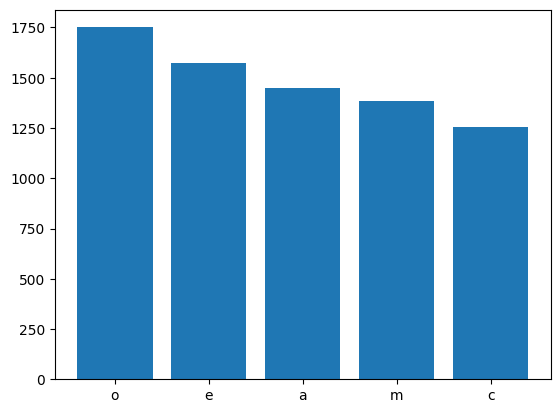

In [167]:
import matplotlib.pyplot as plt
plt.bar(top5_non_spam_email_words,top5_maxcount_non_spam,align='center')

## Figuring out some comparatively more important features

In [168]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset?
# Try taking only top 1.5K that will comprise of some of the most "deciding factors"

## Train - Test Split

In [169]:
# Create trianing and testing data
# df.fillna(0)

df = pd.read_csv('emails.csv')


## Making Predictions using Multinomial NB Classifier

In [170]:
df.isnull().sum()
# df.fillna(0)

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [171]:
df.dropna(inplace=True)

In [172]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [173]:
X = df.drop(['Prediction'],axis = 1)
Y = df['Prediction']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, shuffle = True, random_state=40)

In [174]:
Y_train.isnull().sum()

0

In [175]:
X_train.isnull().sum()

Email No.         0
the               0
to                0
ect               0
and               0
                 ..
infrastructure    0
military          0
allowing          0
ff                0
dry               0
Length: 3001, dtype: int64

In [176]:
len(X_train['Email No.'])

3620

In [177]:
train_email = np.array(X_train['Email No.'])
len(train_email)

3620

In [178]:
email_no = []
for i in range(len(train_email)):
  email_no.append(float(train_email[i][6:]))
len(email_no)

3620

In [179]:
df1 = pd.DataFrame(np.array(email_no), columns = ['Email No.'])

In [180]:
len(df1)

3620

In [181]:
X_train

,Email No.,the,to,ect,and,for,of,a,you,hou,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4645,Email 4646,7,6,4,0,1,2,27,0,0,...,0,0,0,0,0,0,0,0,0,0
3617,Email 3618,42,19,1,8,7,8,215,0,3,...,0,0,0,0,1,0,4,0,3,0
2342,Email 2343,14,11,7,8,3,6,78,6,6,...,0,0,0,0,0,0,0,0,3,0
4785,Email 4786,9,17,4,5,7,2,83,9,0,...,0,0,0,0,0,0,0,0,0,0
1536,Email 1537,9,2,3,1,7,3,24,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,Email 3604,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,Email 4723,6,5,5,3,9,0,85,5,1,...,0,0,0,0,0,0,0,0,0,0
3340,Email 3341,8,7,8,1,2,3,37,0,3,...,0,0,0,0,0,0,0,0,2,0
3064,Email 3065,2,0,1,0,0,1,5,0,0,...,0,0,0,0,0,0,0,0,1,0


In [182]:
X_train.drop(['Email No.'],axis = 1,inplace = True)

In [183]:
X_train.insert(0,'Email No.',email_no,True)

In [184]:
X_train

,Email No.,the,to,ect,and,for,of,a,you,hou,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4645,4646.0,7,6,4,0,1,2,27,0,0,...,0,0,0,0,0,0,0,0,0,0
3617,3618.0,42,19,1,8,7,8,215,0,3,...,0,0,0,0,1,0,4,0,3,0
2342,2343.0,14,11,7,8,3,6,78,6,6,...,0,0,0,0,0,0,0,0,3,0
4785,4786.0,9,17,4,5,7,2,83,9,0,...,0,0,0,0,0,0,0,0,0,0
1536,1537.0,9,2,3,1,7,3,24,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,3604.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,4723.0,6,5,5,3,9,0,85,5,1,...,0,0,0,0,0,0,0,0,0,0
3340,3341.0,8,7,8,1,2,3,37,0,3,...,0,0,0,0,0,0,0,0,2,0
3064,3065.0,2,0,1,0,0,1,5,0,0,...,0,0,0,0,0,0,0,0,1,0


In [185]:
test_email = np.array(X_test['Email No.'])
len(test_email)

1552

In [186]:
email_no_test = []
for i in range(len(test_email)):
  email_no_test.append(float(test_email[i][6:]))
len(email_no_test)

1552

In [187]:
df2 = pd.DataFrame(np.array(email_no_test), columns = ['Email No.'])

In [188]:
len(df2)

1552

In [189]:
X_test

,Email No.,the,to,ect,and,for,of,a,you,hou,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4485,Email 4486,0,2,3,5,1,2,35,0,1,...,0,0,0,0,0,0,0,0,1,0
1936,Email 1937,0,0,1,0,1,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
556,Email 557,1,4,1,0,0,1,12,1,0,...,0,0,0,0,0,0,0,0,1,0
3495,Email 3496,12,15,21,2,12,5,89,4,9,...,0,0,0,0,0,0,0,0,0,0
2200,Email 2201,12,4,1,3,7,6,68,8,0,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,Email 1680,0,0,1,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3948,Email 3949,103,57,23,43,32,66,533,7,10,...,0,0,0,0,6,0,0,0,7,0
4897,Email 4898,1,0,1,2,0,0,16,1,0,...,0,0,0,0,0,0,0,0,1,0
1608,Email 1609,5,1,2,1,2,0,12,0,2,...,0,0,0,0,0,0,0,0,0,0


In [190]:
X_test.drop(['Email No.'],axis = 1,inplace = True)

In [191]:
X_test.insert(0,'Email No.',email_no_test,True)

In [192]:
X_test

,Email No.,the,to,ect,and,for,of,a,you,hou,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4485,4486.0,0,2,3,5,1,2,35,0,1,...,0,0,0,0,0,0,0,0,1,0
1936,1937.0,0,0,1,0,1,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
556,557.0,1,4,1,0,0,1,12,1,0,...,0,0,0,0,0,0,0,0,1,0
3495,3496.0,12,15,21,2,12,5,89,4,9,...,0,0,0,0,0,0,0,0,0,0
2200,2201.0,12,4,1,3,7,6,68,8,0,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,1680.0,0,0,1,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3948,3949.0,103,57,23,43,32,66,533,7,10,...,0,0,0,0,6,0,0,0,7,0
4897,4898.0,1,0,1,2,0,0,16,1,0,...,0,0,0,0,0,0,0,0,1,0
1608,1609.0,5,1,2,1,2,0,12,0,2,...,0,0,0,0,0,0,0,0,0,0


In [193]:
# Feed the train data into multinomial naive bias classifier

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)


In [194]:
print(Y_pred)

[1 0 1 ... 1 0 0]


In [195]:
y_test = np.array(Y_test)
print(y_test)

[1 0 1 ... 1 0 0]


In [196]:
# Check the model's accuracy of test data and plot the ROC-AUC curve
print(len(y_test))
print(len(Y_pred))

correct = 0
for i in range(len(y_test)):
  if(y_test[i] == Y_pred[i]):
    correct = correct + 1
accuracy = (correct/len(y_test)) * 100
print(accuracy)

1552
1552
94.52319587628865


## Plot the confusion Matrix

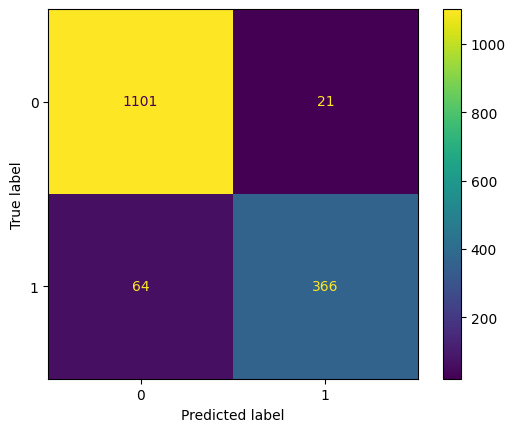

In [197]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


## Trying out with SVMs

In [198]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [199]:
y_pred_svc = clf.predict(X_test)

In [200]:
correct1 = 0
for i in range(len(y_test)):
  if(y_test[i] == y_pred_svc[i]):
    correct1 = correct1 + 1
accuracy1 = (correct1/len(y_test)) * 100
print(accuracy1)

93.23453608247422


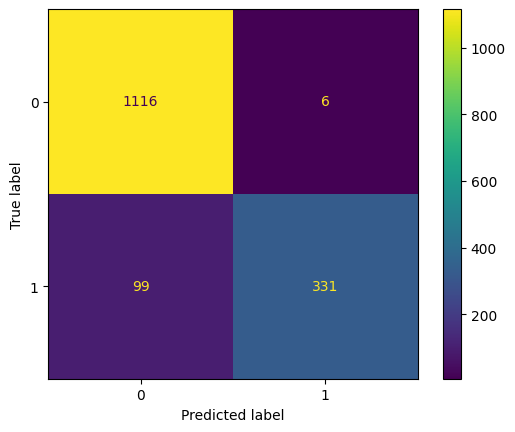

In [201]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Comparing the models

In [206]:
# Which model performed better?
# Can you suggest some reason for better performance of one model over the other?
# Naive bayes classifier performed better than SVC

## Bonus Question

In [207]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [208]:
s = "I am a Python developer and currently working on a project to classify mails"
S = s.split(" ")
print(S)
dictionary = {}
for i in range(len(S)):
  if not S[i] in dictionary:
    dictionary[S[i]] = 1
  else:
    dictionary[S[i]] += 1

['I', 'am', 'a', 'Python', 'developer', 'and', 'currently', 'working', 'on', 'a', 'project', 'to', 'classify', 'mails']


In [209]:
dictionary

{'I': 1,
 'am': 1,
 'a': 2,
 'Python': 1,
 'developer': 1,
 'and': 1,
 'currently': 1,
 'working': 1,
 'on': 1,
 'project': 1,
 'to': 1,
 'classify': 1,
 'mails': 1}

In [215]:
words = [[] for i in range(len(dictionary))]
# count_words = []
for i in range(len(dictionary)):
  words[i].append(S[i])
  words[i].append(dictionary[S[i]])

In [216]:
words

[['I', 1],
 ['am', 1],
 ['a', 2],
 ['Python', 1],
 ['developer', 1],
 ['and', 1],
 ['currently', 1],
 ['working', 1],
 ['on', 1],
 ['a', 2],
 ['project', 1],
 ['to', 1],
 ['classify', 1]]

In [217]:
# count_words

In [218]:
df3 = pd.DataFrame(np.array(words),columns = ['words','count'])

In [220]:
df3

,words,count
0,I,1
1,am,1
2,a,2
3,Python,1
4,developer,1
5,and,1
6,currently,1
7,working,1
8,on,1
9,a,2
